# <u>PRACTICAL - 2</u>

## <u>QUESTION</u> -

### Perform the following text mining preprocessing steps on a text document:
### a. Stop Word Removal
### b. Stemming
### c. Removal of punctuation marks
### d. Compute the inverse document frequency of the words in the document

### <u>DATASET</u> -> India Spam SMS Classification (https://www.kaggle.com/datasets/junioralive/india-spam-sms-classification)

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)

In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [3]:
# Import Dataset

df=pd.read_csv('spam_ham_india.csv')

In [4]:
df.head(10)

,Msg,Label
0,CONGRATULATIONS! FREE 2GB data is yours! Claim on Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB,spam
1,"Hi! Thank you for being with Vi-India's FASTEST 4G, Ookla-verified. We'd love to improve ourselves! Click http://bit.ly/3uU8D31 to share your feedback.",spam
2,"As part of Cyber Swachhta Pakhwada, CERT-In GoI advises you to keep your digital devices bot free. Get bot removal tool at https://www.csk.gov.in",spam
3,I will try to manage took tablets,ham
4,Study from Home with Vi!! Watch Kite Victers Channel FREE on your Mobile with Vi . Download Vi Movies and TV app now . Click bit.ly/Vi-kite2,spam
5,Get it fixed asap,ham
6,?image omitted,ham
7,Not sure if I can join by tomorrow morning,ham
8,"Hi, [1] new Home Loan offer for you | Rates start as low as 6.75% | EMIs from Rs. 649/lakh. Apply now. TnC apply bnkbzr.co/o68urxqDiB",spam
9,"The summer heat is here ! Get your AC, Air Cooler or Fridge now and pay later at no cost using Federal Bank Debit Card EMI ! Click https://fdrl.in/t/dPmgHO for the latest offers -Federal Bank",spam


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2267 entries, 0 to 2266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Msg     2266 non-null   object
 1   Label   2267 non-null   object
dtypes: object(2)
memory usage: 35.5+ KB


In [6]:
df.isnull().sum()

Msg      1
Label    0
dtype: int64

In [7]:
# Drop rows with null values

df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266 entries, 0 to 2266
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Msg     2266 non-null   object
 1   Label   2266 non-null   object
dtypes: object(2)
memory usage: 53.1+ KB


In [9]:
df.Label.value_counts()

ham     1521
spam     745
Name: Label, dtype: int64

In [10]:
df_text=df[['Msg']]
df_text.head()

,Msg
0,CONGRATULATIONS! FREE 2GB data is yours! Claim on Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB
1,"Hi! Thank you for being with Vi-India's FASTEST 4G, Ookla-verified. We'd love to improve ourselves! Click http://bit.ly/3uU8D31 to share your feedback."
2,"As part of Cyber Swachhta Pakhwada, CERT-In GoI advises you to keep your digital devices bot free. Get bot removal tool at https://www.csk.gov.in"
3,I will try to manage took tablets
4,Study from Home with Vi!! Watch Kite Victers Channel FREE on your Mobile with Vi . Download Vi Movies and TV app now . Click bit.ly/Vi-kite2


In [11]:
# Convert to 'string' data type

df_text['Msg']=df_text['Msg'].astype(str)
df_text.head()

,Msg
0,CONGRATULATIONS! FREE 2GB data is yours! Claim on Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB
1,"Hi! Thank you for being with Vi-India's FASTEST 4G, Ookla-verified. We'd love to improve ourselves! Click http://bit.ly/3uU8D31 to share your feedback."
2,"As part of Cyber Swachhta Pakhwada, CERT-In GoI advises you to keep your digital devices bot free. Get bot removal tool at https://www.csk.gov.in"
3,I will try to manage took tablets
4,Study from Home with Vi!! Watch Kite Victers Channel FREE on your Mobile with Vi . Download Vi Movies and TV app now . Click bit.ly/Vi-kite2


#### STOP WORD REMOVAL

In [12]:
# import nltk
# nltk.download('stopwords')

",".join(stopwords.words("english"))

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [13]:
STOPWORDS=set(stopwords.words("english"))

def remove_stopword(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
    
df_text["text_to_stop"]=df_text['Msg'].apply(lambda text: remove_stopword(text))
df_text.head()

,Msg,text_to_stop
0,CONGRATULATIONS! FREE 2GB data is yours! Claim on Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB,CONGRATULATIONS! FREE 2GB data yours! Claim Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB
1,"Hi! Thank you for being with Vi-India's FASTEST 4G, Ookla-verified. We'd love to improve ourselves! Click http://bit.ly/3uU8D31 to share your feedback.","Hi! Thank Vi-India's FASTEST 4G, Ookla-verified. We'd love improve ourselves! Click http://bit.ly/3uU8D31 share feedback."
2,"As part of Cyber Swachhta Pakhwada, CERT-In GoI advises you to keep your digital devices bot free. Get bot removal tool at https://www.csk.gov.in","As part Cyber Swachhta Pakhwada, CERT-In GoI advises keep digital devices bot free. Get bot removal tool https://www.csk.gov.in"
3,I will try to manage took tablets,I try manage took tablets
4,Study from Home with Vi!! Watch Kite Victers Channel FREE on your Mobile with Vi . Download Vi Movies and TV app now . Click bit.ly/Vi-kite2,Study Home Vi!! Watch Kite Victers Channel FREE Mobile Vi . Download Vi Movies TV app . Click bit.ly/Vi-kite2


In [14]:
text1=df_text["text_to_stop"].head()

# Bag of Words of top 5 rows

vectorizer=CountVectorizer()
bow_matrix=vectorizer.fit_transform(text1)
vocab=vectorizer.get_feature_names_out()
bow_df_1=pd.DataFrame(bow_matrix.toarray(), columns=vocab)
print("Bag of Words:")
print(bow_df_1)

Bag of Words:
   2gb  3uu8d31  4g  advises  airtel  app  as  bit  bot  cert  ...  tool  try  \
0    1        0   0        0       2    1   0    0    0     0  ...     0    0   
1    0        1   1        0       0    0   0    1    0     0  ...     0    0   
2    0        0   0        1       0    0   1    0    2     1  ...     1    0   
3    0        0   0        0       0    0   0    0    0     0  ...     0    1   
4    0        0   0        0       0    1   0    1    0     0  ...     0    0   

   tv  verified  vi  victers  watch  we  www  yours  
0   0         0   0        0      0   0    0      1  
1   0         1   1        0      0   1    0      0  
2   0         0   0        0      0   0    1      0  
3   0         0   0        0      0   0    0      0  
4   1         0   4        1      1   0    0      0  

[5 rows x 66 columns]


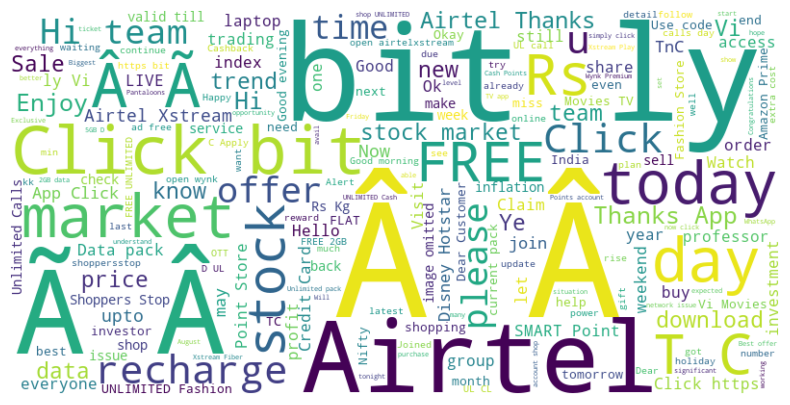

In [15]:
combined_text1=" ".join(df_text["text_to_stop"])

# Generating the Word Cloud

wordcloud=WordCloud(width=800, height=400, background_color="white").generate(combined_text1)

# Plotting the Word Cloud

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [16]:
df_text.drop(['text_to_stop'], axis=1, inplace=True)

#### STEMMING

In [17]:
stemmer=PorterStemmer()

def stem_porter(text):
        return " ".join([stemmer.stem(word) for word in text.split()])
    
df_text["text_stemmed"]=df_text['Msg'].apply(lambda text : stem_porter(text))
df_text.head()

,Msg,text_stemmed
0,CONGRATULATIONS! FREE 2GB data is yours! Claim on Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB,congratulations! free 2gb data is yours! claim on airtel thank app now. hurri i.airtel.in/e/csl_ml_2gb
1,"Hi! Thank you for being with Vi-India's FASTEST 4G, Ookla-verified. We'd love to improve ourselves! Click http://bit.ly/3uU8D31 to share your feedback.","hi! thank you for be with vi-india' fastest 4g, ookla-verified. we'd love to improv ourselves! click http://bit.ly/3uu8d31 to share your feedback."
2,"As part of Cyber Swachhta Pakhwada, CERT-In GoI advises you to keep your digital devices bot free. Get bot removal tool at https://www.csk.gov.in","as part of cyber swachhta pakhwada, cert-in goi advis you to keep your digit devic bot free. get bot remov tool at https://www.csk.gov.in"
3,I will try to manage took tablets,i will tri to manag took tablet
4,Study from Home with Vi!! Watch Kite Victers Channel FREE on your Mobile with Vi . Download Vi Movies and TV app now . Click bit.ly/Vi-kite2,studi from home with vi!! watch kite victer channel free on your mobil with vi . download vi movi and tv app now . click bit.ly/vi-kite2


In [18]:
text2=df_text["text_stemmed"].head()
vectorizer=CountVectorizer()
bow_matrix=vectorizer.fit_transform(text2)
vocab=vectorizer.get_feature_names_out()
bow_df_2=pd.DataFrame(bow_matrix.toarray(), columns=vocab)
print("Bag of Words:")
print(bow_df_2)

Bag of Words:
   2gb  3uu8d31  4g  advis  airtel  and  app  as  at  be  ...  vi  victer  \
0    1        0   0      0       2    0    1   0   0   0  ...   0       0   
1    0        1   1      0       0    0    0   0   0   1  ...   1       0   
2    0        0   0      1       0    0    0   1   1   0  ...   0       0   
3    0        0   0      0       0    0    0   0   0   0  ...   0       0   
4    0        0   0      0       0    1    1   0   0   0  ...   4       1   

   watch  we  will  with  www  you  your  yours  
0      0   0     0     0    0    0     0      1  
1      0   1     0     1    0    1     1      0  
2      0   0     0     0    1    1     1      0  
3      0   0     1     0    0    0     0      0  
4      1   0     0     2    0    0     1      0  

[5 rows x 78 columns]


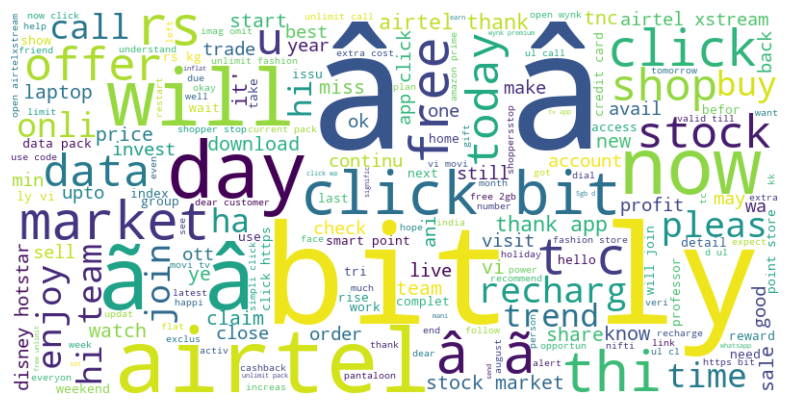

In [19]:
combined_text2=" ".join(df_text["text_stemmed"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [20]:
df_text.drop(['text_stemmed'], axis=1, inplace=True)

#### REMOVAL OF PUNCTUATION MARKS

In [21]:
punc_to_remove=string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('','', punc_to_remove))

df_text["text_to_punc"]=df_text['Msg'].apply(lambda text: remove_punctuation(text))

df_text.head()

,Msg,text_to_punc
0,CONGRATULATIONS! FREE 2GB data is yours! Claim on Airtel Thanks App Now. Hurry i.airtel.in/e/csl_ml_2GB,CONGRATULATIONS FREE 2GB data is yours Claim on Airtel Thanks App Now Hurry iairtelinecslml2GB
1,"Hi! Thank you for being with Vi-India's FASTEST 4G, Ookla-verified. We'd love to improve ourselves! Click http://bit.ly/3uU8D31 to share your feedback.",Hi Thank you for being with ViIndias FASTEST 4G Ooklaverified Wed love to improve ourselves Click httpbitly3uU8D31 to share your feedback
2,"As part of Cyber Swachhta Pakhwada, CERT-In GoI advises you to keep your digital devices bot free. Get bot removal tool at https://www.csk.gov.in",As part of Cyber Swachhta Pakhwada CERTIn GoI advises you to keep your digital devices bot free Get bot removal tool at httpswwwcskgovin
3,I will try to manage took tablets,I will try to manage took tablets
4,Study from Home with Vi!! Watch Kite Victers Channel FREE on your Mobile with Vi . Download Vi Movies and TV app now . Click bit.ly/Vi-kite2,Study from Home with Vi Watch Kite Victers Channel FREE on your Mobile with Vi Download Vi Movies and TV app now Click bitlyVikite2


In [22]:
text3=df_text["text_to_punc"].head()
vectorizer=CountVectorizer()
bow_matrix=vectorizer.fit_transform(text3)
vocab=vectorizer.get_feature_names_out()
bow_df_3=pd.DataFrame(bow_matrix.toarray(), columns=vocab)
print("Bag of Words:")
print(bow_df_3)

Bag of Words:
   2gb  4g  advises  airtel  and  app  as  at  being  bitlyvikite2  ...  vi  \
0    1   0        0       1    0    1   0   0      0             0  ...   0   
1    0   1        0       0    0    0   0   0      1             0  ...   0   
2    0   0        1       0    0    0   1   1      0             0  ...   0   
3    0   0        0       0    0    0   0   0      0             0  ...   0   
4    0   0        0       0    1    1   0   0      0             1  ...   3   

   victers  viindias  watch  wed  will  with  you  your  yours  
0        0         0      0    0     0     0    0     0      1  
1        0         1      0    1     0     1    1     1      0  
2        0         0      0    0     0     0    1     1      0  
3        0         0      0    0     1     0    0     0      0  
4        1         0      1    0     0     2    0     1      0  

[5 rows x 71 columns]


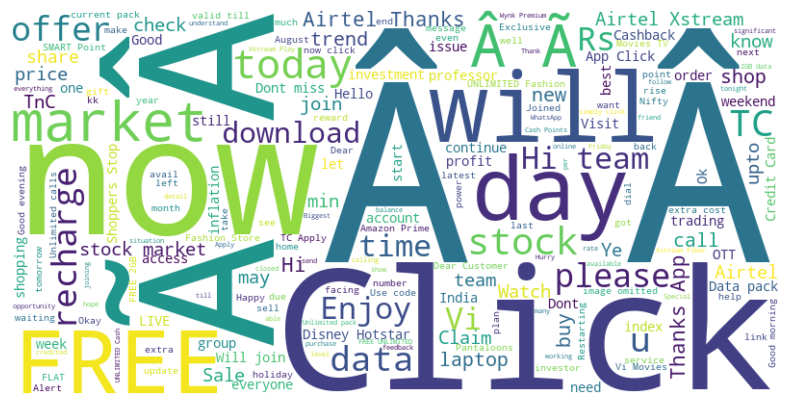

In [23]:
combined_text3=" ".join(df_text["text_to_punc"])
wordcloud=WordCloud(width=800, height=400, background_color="white").generate(combined_text3)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off") 
plt.show()

In [24]:
df_text.drop(['text_to_punc'], axis=1, inplace=True)

#### INVERSE DOCUMENT FREQUENCY

In [25]:
documents=df_text['Msg'].tolist()
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(documents)

idf_values=vectorizer.idf_
idf_dict=dict(zip(vectorizer.get_feature_names_out(), idf_values))

# Sorting the dictionary by IDF values in ascending order

sorted_idf=sorted(idf_dict.items(), key=lambda x: x[1])

# Extract Bottom 20 Words (Least Unique)

bottom_20_words=sorted_idf[:20]

# Extract Top 20 Words (Most Unique)

top_20_words=sorted_idf[-20:]

print("Bottom 20 Words (Least Unique):")
for word, idf in bottom_20_words:
    print(f"{word}: {idf}")

print("\nTop 20 Words (Most Unique):")
for word, idf in top_20_words:
    print(f"{word}: {idf}")

Bottom 20 Words (Least Unique):
to: 2.2569623337117566
in: 2.3326218965568972
the: 2.3718426097101784
on: 2.5338501610326567
click: 2.72232558340099
your: 2.783413275380828
for: 2.7992866245371184
is: 2.8263152969250376
and: 2.9271199960470033
you: 2.9961128675339546
now: 3.0914230473382793
of: 3.13150127090569
with: 3.1389639921072794
bit: 3.1616922431848358
get: 3.1732530655859117
at: 3.184949105349103
free: 3.184949105349103
ly: 3.1888783834889924
it: 3.1967835629961057
will: 3.4080926566633125

Top 20 Words (Most Unique):
âª: 8.033065469947584
âªã: 8.033065469947584
â³: 8.033065469947584
â³looking: 8.033065469947584
â³ã: 8.033065469947584
âµã: 8.033065469947584
â¹1340: 8.033065469947584
â¹15: 8.033065469947584
â¹16: 8.033065469947584
â¹19: 8.033065469947584
â¹20: 8.033065469947584
â¹21: 8.033065469947584
â¹2213: 8.033065469947584
â¹7: 8.033065469947584
â¹8: 8.033065469947584
â¹ã: 8.033065469947584
âºã: 8.033065469947584
â¼: 8.033065469947584
â¼â: 8.033065469947584
â¾: 8.03306546994

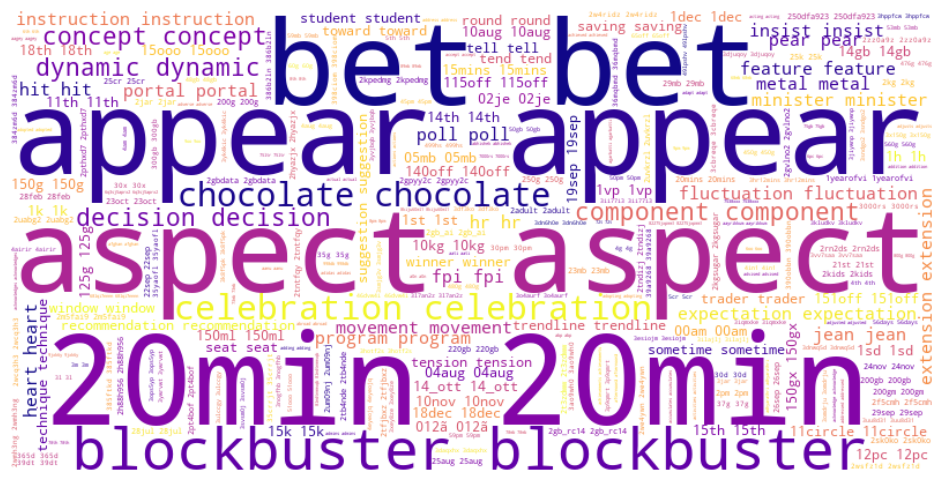

In [26]:
# Scale IDF values

idf_text_all=" ".join([f"{word} " * int(idf * 10) for word, idf in idf_dict.items()]) 

# Generating the Word Cloud

wordcloud_all = WordCloud(width=800, height=400, background_color="white", colormap="plasma", \
                          max_words=1000).generate(idf_text_all)

# Plotting the Word Cloud

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_all, interpolation="bilinear")
plt.axis("off")
plt.show()

## THANK YOU